# Coffee Quality 

For this project, we will look at information about coffee quality. 

## Data and Data Dictionary
Data is from the [Coffee Quality Data (CQI May-2023)](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi) dataset on Kaggle. 

There are 41 columns and 207 rows. 22 columns are ```object```, 13 are ```float```, and 6 are ```integer```.

- ```Unnamed: 0```
- ```ID```
- ```Country of Origin```
- ```Farm Name```
- ```Lot Number```
- ```Mill```
- ```ICO Number```
- ```Company```
- ```Altitude```
- ```Region```
- ```Producer```
- ```Number of Bags```
- ```Bag Weight```
- ```In-Country Partner```
- ```Harvest Year```
- ```Grading Date```
- ```Owner```
- ```Variety```
- ```Status```
- ```Processing Method```
- ```Aroma```
- ```Flavor```
- ```Aftertaste```
- ```Acidity```
- ```Body```
- ```Balance```
- ```Uniformity```
- ```Clean Cup```
- ```Sweetness```
- ```Overall```
- ```Defects```
- ```Total Cup Points``` = Sum of Aroma, Flavor, Aftertaste, Acidity, Body, Balance, uniformity, Clean cup, and sweetness
- ```Moisture Percentage```
- ```Category One Defects```
- ```Quakers```
- ```Color```
- ```Category Two Defects```
- ```Expiration```
- ```Certification Body```
- ```Certification Address```
- ```Certification Contact```


## Goal

We are going to build a model that can predict the ```Total Cup Points``` based on ```Country of Origin```, ```Company```, ```Altitude```, ```Region```, ```Producer```, ```Harvest Year```, ```Processing Method```, ```Moisture Percentage```, ```Category One Defects```, ```Color```, ```Category Two Defects```. 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-white')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    linewidth=4
    )


%matplotlib inline


## Data Loading and Preliminary Exploration

In [3]:
coffee = pd.read_csv('df_arabica_clean.csv')

In [4]:
# select the columns of interest
cols = ['Total Cup Points','Country of Origin','Company','Altitude','Region','Producer',
        'Harvest Year','Processing Method','Moisture Percentage','Category One Defects',
        'Color','Category Two Defects']

coffee_reduced = coffee[cols]

In [5]:
coffee_reduced.head()

,Total Cup Points,Country of Origin,Company,Altitude,Region,Producer,Harvest Year,Processing Method,Moisture Percentage,Category One Defects,Color,Category Two Defects
0,89.33,Colombia,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,2021 / 2022,Double Anaerobic Washed,11.8,0,green,3
1,87.58,Taiwan,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,2021 / 2022,Washed / Wet,10.5,0,blue-green,0
2,87.42,Laos,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,2021 / 2022,Semi Washed,10.4,0,yellowish,2
3,87.17,Costa Rica,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,2022,Washed / Wet,11.8,0,green,0
4,87.08,Colombia,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2022,"Honey,Mossto",11.6,0,yellow-green,2


In [5]:
coffee_reduced.describe()

,Total Cup Points,Moisture Percentage,Category One Defects,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000
mean,83.706570,10.735266,0.135266,2.251208
std,1.730417,1.247468,0.592070,2.950183
min,78.000000,0.000000,0.000000,0.000000
25%,82.580000,10.100000,0.000000,0.000000
50%,83.750000,10.800000,0.000000,1.000000
75%,84.830000,11.500000,0.000000,3.000000
max,89.330000,13.500000,5.000000,16.000000


In [5]:
coffee_reduced.dtypes.value_counts()

object     8
float64    2
int64      2
dtype: int64

In [6]:
coffee_reduced.isnull().sum()


Total Cup Points        0
Country of Origin       0
Company                 0
Altitude                1
Region                  2
Producer                1
Harvest Year            0
Processing Method       5
Moisture Percentage     0
Category One Defects    0
Color                   0
Category Two Defects    0
dtype: int64

In [7]:
coffee_reduced.nunique()

Total Cup Points         81
Country of Origin        22
Company                  72
Altitude                 97
Region                  120
Producer                172
Harvest Year              7
Processing Method        10
Moisture Percentage      46
Category One Defects      6
Color                    12
Category Two Defects     14
dtype: int64

In [8]:
coffee.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [9]:
coffee_reduced.shape

(207, 12)

## Visualizing the Data

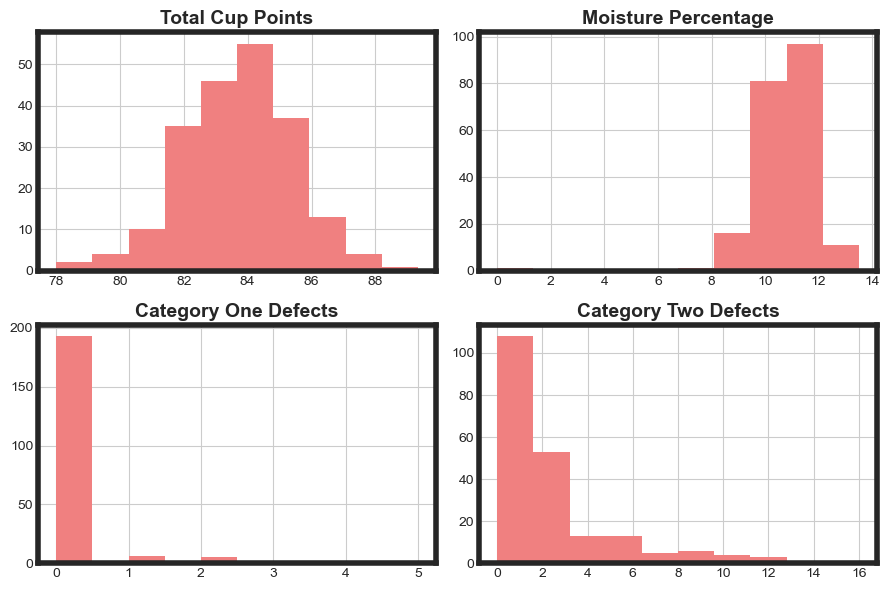

In [10]:
histograms = coffee_reduced.hist(figsize=(9,6),color='lightcoral')

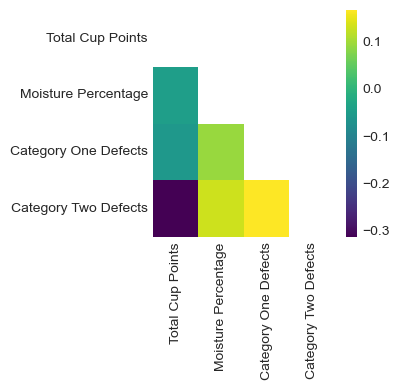

In [11]:
# plot a correlation matrix

corr = coffee_reduced.corr(numeric_only=True)

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the figure
plt.figure(figsize=(4,4))
sns.heatmap(corr,mask=mask,cmap='viridis')
plt.show()

## Data Cleaning

Let's start by renaming the columns so there is no whitespace. We'll replace the whitespace with underscores.

In [6]:
coffee_reduced.columns = coffee_reduced.columns.str.replace(' ','_')

In [11]:
coffee_reduced.dtypes

Total_Cup_Points        float64
Country_of_Origin        object
Company                  object
Altitude                 object
Region                   object
Producer                 object
Harvest_Year             object
Processing_Method        object
Moisture_Percentage     float64
Category_One_Defects      int64
Color                    object
Category_Two_Defects      int64
dtype: object

Next, we'll start looking at the categorical columns, to decide how to treat these columns. 

Let's start with the ```Country_Of_Origin``` column 

In [12]:
coffee_reduced.nunique()

Total_Cup_Points         81
Country_of_Origin        22
Company                  72
Altitude                 97
Region                  120
Producer                172
Harvest_Year              7
Processing_Method        10
Moisture_Percentage      46
Category_One_Defects      6
Color                    12
Category_Two_Defects     14
dtype: int64

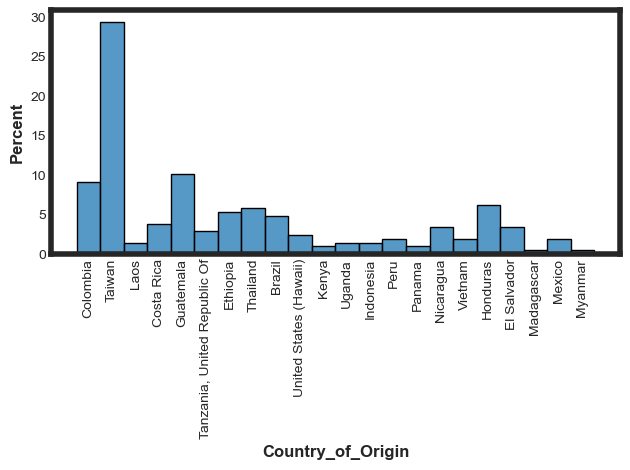

In [13]:
sns.histplot(data=coffee_reduced,x='Country_of_Origin',
            stat='percent')

plt.xticks(rotation=90)
plt.show()

There are 22 unique countries in the dataset, and no missing data. This column is nominal, there is no intrinsic order. Similar geographic regions will, in general, have similar environmental conditions. Let's reduce the dimensionality by categorizing these by continent. Once we build our model, we can test with both country and continent to compare results. 

In [14]:
coffee_reduced['Country_of_Origin'].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania, United Republic Of', 'Ethiopia', 'Thailand', 'Brazil',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Indonesia', 'Peru',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Madagascar', 'Mexico', 'Myanmar'], dtype=object)

In [7]:
mapping_dict = {'Colombia' : 'SouthAmerica',
               'Taiwan' : 'Asia',
               'Laos' : 'Asia',
               'Costa Rica' : 'CentralAmerica',
               'Guatemala' : 'CentralAmerica',
               'Tanzania, United Republic Of' : 'Africa',
               'Ethiopia' : 'Africa',
               'Thailand' : 'Asia',
               'Brazil' : 'SouthAmerica',
               'United States (Hawaii)' : 'NorthAmerica',
               'Kenya' : 'Africa',
               'Uganda' : 'Africa',
               'Indonesia' : 'Asia',
               'Peru' : 'SouthAmerica',
               'Panama' : 'CentralAmerica',
               'Nicaragua' : 'CentralAmerica',
               'Vietnam' : 'Asia',
               'Honduras' : 'CentralAmerica',
               'El Salvador' : 'CentralAmerica',
               'Madagascar' : 'Africa',
               'Mexico' : 'NorthAmerica',
               'Myanmar' : 'Asia'}

coffee_reduced['continent'] = coffee_reduced['Country_of_Origin'].map(mapping_dict)

/var/folders/gy/qftxzz157cz4xv36kyp3yp59ztxvbq/T/ipykernel_41411/2904478593.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_reduced['continent'] = coffee_reduced['Country_of_Origin'].map(mapping_dict)


Now that we have mapped these values, we can encode them using Pandas get_dummies

In [15]:
coffee_clean = pd.get_dummies(coffee_reduced,
                          columns = ['continent'],
                           prefix = 'con',
                          drop_first = True)

# drop the original Country_of_Origin column
coffee_clean.drop(columns=['Country_of_Origin'],inplace=True)

In [9]:
coffee_clean.head()

,Total_Cup_Points,Company,Altitude,Region,Producer,Harvest_Year,Processing_Method,Moisture_Percentage,Category_One_Defects,Color,Category_Two_Defects,con_Asia,con_CentralAmerica,con_NorthAmerica,con_SouthAmerica
0,89.33,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,2021 / 2022,Double Anaerobic Washed,11.8,0,green,3,0,0,0,1
1,87.58,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,2021 / 2022,Washed / Wet,10.5,0,blue-green,0,1,0,0,0
2,87.42,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,2021 / 2022,Semi Washed,10.4,0,yellowish,2,1,0,0,0
3,87.17,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,2022,Washed / Wet,11.8,0,green,0,0,1,0,0
4,87.08,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2022,"Honey,Mossto",11.6,0,yellow-green,2,0,0,0,1


Now, let's take a look at the Company column.

In [60]:
company_list = coffee_clean['Company'].value_counts()
company_list

Taiwan Coffee Laboratory        51
Taiwu Coffee Cooperative        25
Coffee Quality Union            15
Doi Tung Development Project     7
Peter Schoenfeld, S.A.           6
                                ..
Taylor Winch Coffee Ltd          1
ECOM COLOMBIA                    1
Exportadora Café California      1
Coffee Quality Institute         1
marubeni                         1
Name: Company, Length: 72, dtype: int64

/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23480 (\N{CJK UNIFIED IDEOGRAPH-5BB8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23975 (\N{CJK UNIFIED IDEOGRAPH-5DA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26377 (\N{CJK

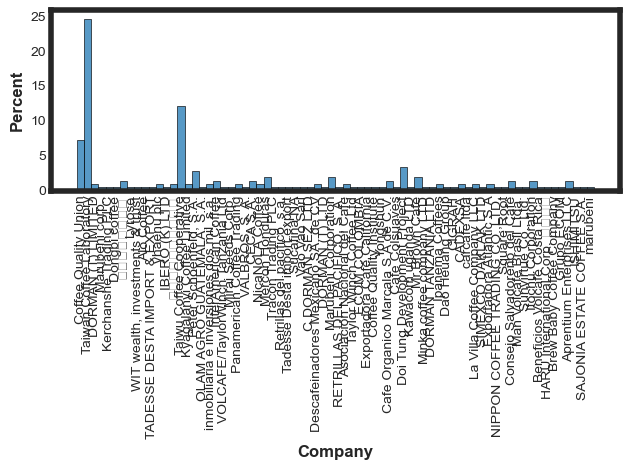

In [44]:
sns.histplot(data=coffee_reduced,x='Company',
            stat='percent')

plt.xticks(rotation=90)
plt.show()

There are 72 companies included in the data and 43% of total entries come from 3 companies. For the moment, we are going to drop this column, as the data is most likely too sparse to provide useful information. We might return to this decision and consider grouping the companies into something like 'Major Company' and 'Minor Company'.

In [16]:
coffee_clean.drop(columns=['Company'],inplace=True)

Next, let's investigate the Altitude column.

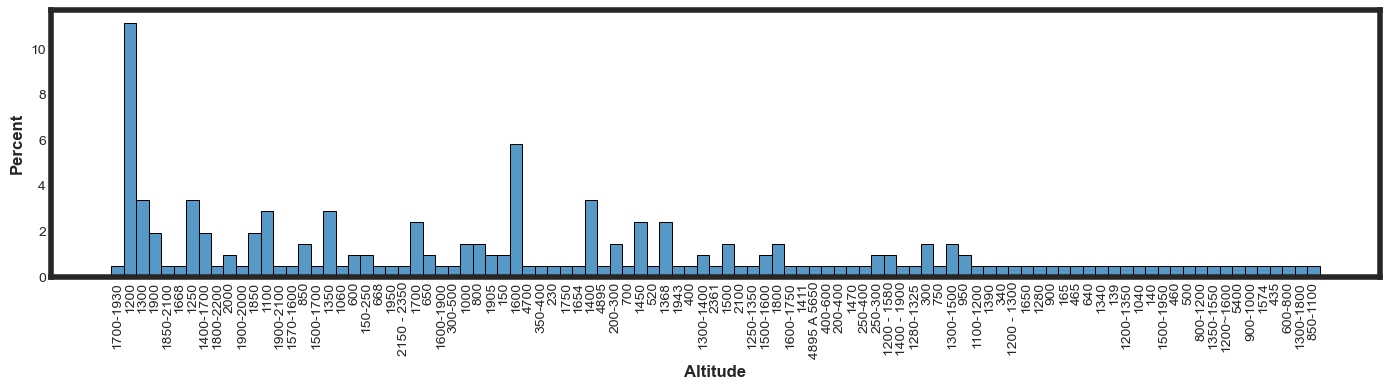

In [53]:
plt.figure(figsize=(14,4))

sns.histplot(data=coffee_reduced,x='Altitude',
            stat='percent')

plt.xticks(rotation=90)
plt.show()

Most of these are numerical values, but there are a number of ranges. Let's convert the ranges to averages so that each entry can be numerical.

In [11]:
def modify_altitude(entry):
    try:
        entry = str(entry)
        if '-' in entry:
            values = entry.split('-')
            mean = np.mean(list(map(int,testsplit)))
        elif 'A' in entry:
            values = entry.split('A')
            mean = np.mean(list(map(int,testsplit)))
        else:
            mean = int(entry)
        return mean
    except:
        return np.nan
    

In [17]:
coffee_clean['Altitude'] = coffee_clean['Altitude'].apply(modify_altitude)

# impute single missing value with median
coffee_clean['Altitude'] = coffee_clean['Altitude'].fillna(coffee_clean['Altitude'].median())

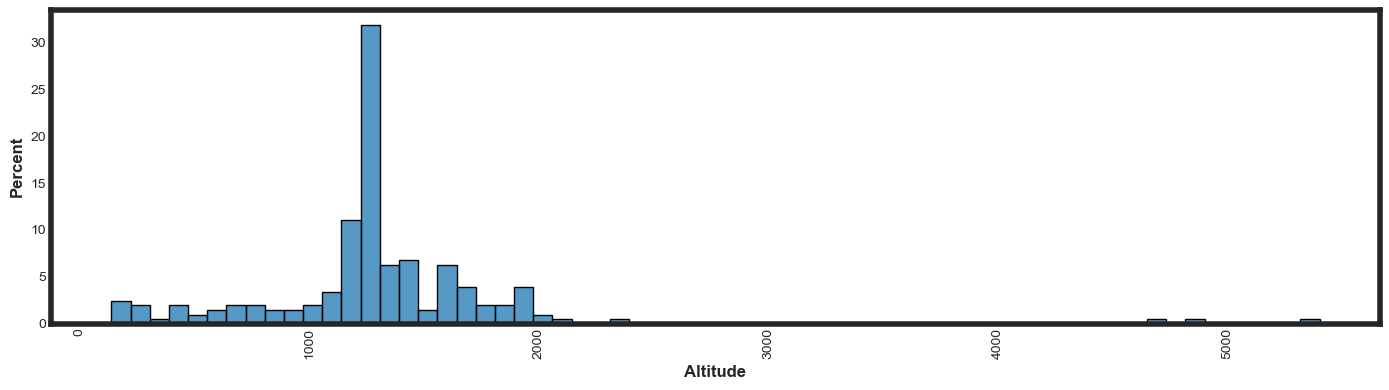

In [18]:
plt.figure(figsize=(14,4))

sns.histplot(data=coffee_clean,x='Altitude',
            stat='percent')

plt.xticks(rotation=90)
plt.show()

### Clean the Region Column

/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37109 (\N{CJK UNIFIED IDEOGRAPH-90F5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36958 (\N{CJK UNIFIED IDEOGRAPH-905E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-865F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21331 (\N{CJK

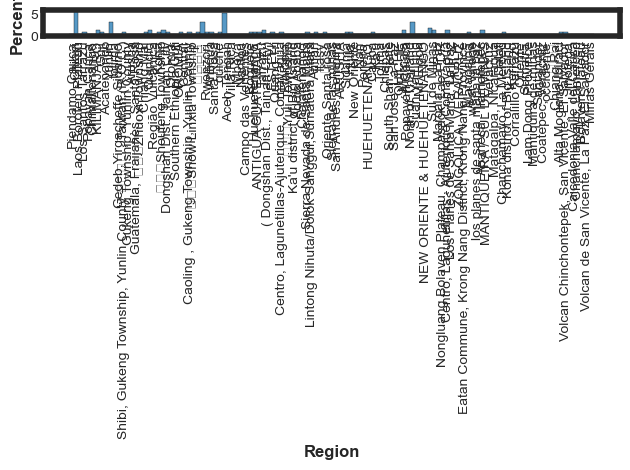

In [19]:
sns.histplot(data=coffee_clean,x='Region',
            stat='percent')

plt.xticks(rotation=90)
plt.show()

In [21]:
coffee_clean['Region'].nunique()

120

In [22]:
coffee_clean.shape

(207, 14)

There are 120 unique values for Region, so we will remove this column for now. 

In [23]:
coffee_clean.drop(columns=['Region'],inplace=True)

### Clean the Producer Column

In [24]:
coffee_clean['Producer'].nunique()

172

/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26366 (\N{CJK UNIFIED IDEOGRAPH-66FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31119 (\N{CJK UNIFIED IDEOGRAPH-798F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26862 (\N{CJK UNIFIED IDEOGRAPH-68EE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40643 (\N{CJK UNIFIED IDEOGRAPH-9EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20445 (\N{CJK

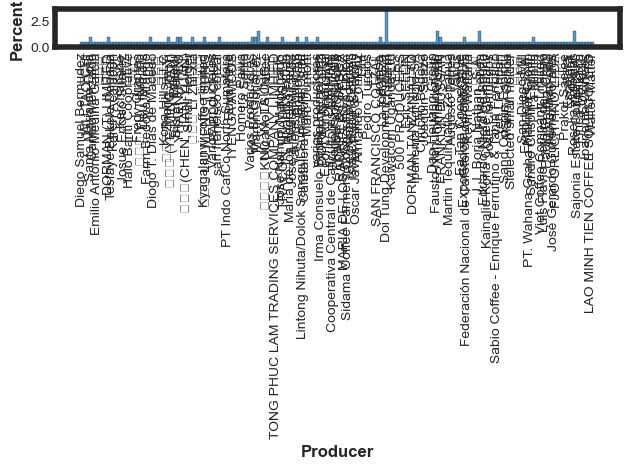

In [25]:
sns.histplot(data=coffee_clean,x='Producer',
            stat='percent')

plt.xticks(rotation=90)
plt.show()

There are 172 unique values for Producer, so we will remove this column for now. 

In [26]:
coffee_clean.drop(columns=['Producer'],inplace=True)

### Clean the Harvest Year Column

In [28]:
coffee_clean['Harvest_Year'].value_counts()

2021 / 2022    99
2022           48
2022 / 2023    42
2021           13
2023            3
2017 / 2018     1
2018 / 2019     1
Name: Harvest_Year, dtype: int64

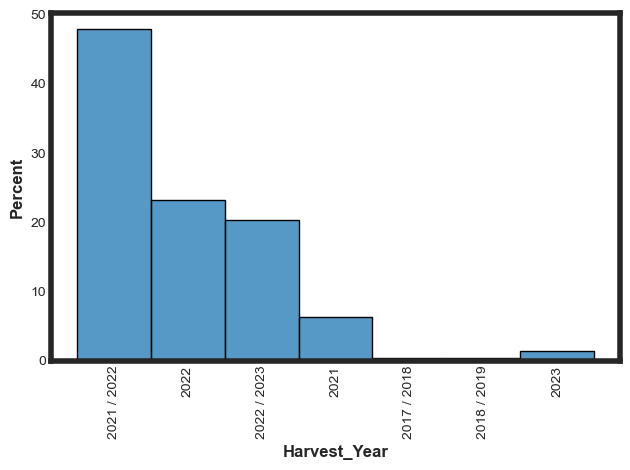

In [29]:
sns.histplot(data=coffee_clean,x='Harvest_Year',
            stat='percent')

plt.xticks(rotation=90)
plt.show()

These are categorical values, so we will need to encode them so they are not treated as numerical data. We are going to move the 2023 data to the 2022/2023 bin since there are so few values for 2023. We will also combine the 2017/2018 and 2018/2019 values into a single bin of 2 values. There is a gap between these years and the next set of 2021/2022. 

In [32]:
coffee_clean['Harvest_Year'].unique()

array(['2021 / 2022', '2022', '2022 / 2023', '2021', '2017 / 2018',
       '2018 / 2019', '2023'], dtype=object)

In [33]:
coffee_clean['Harvest_Year'].replace({'2023' : '2022 / 2023',
                                     '2017 / 2018' : '2018',
                                     '2018 / 2019' : '2018'},
                                    inplace=True)

In [34]:
coffee_clean['Harvest_Year'].unique()

array(['2021 / 2022', '2022', '2022 / 2023', '2021', '2018'], dtype=object)

### Clean the Processing_Method column

In [36]:
coffee_clean['Processing_Method'].value_counts()

Washed / Wet                            124
Natural / Dry                            46
Pulped natural / honey                   25
Double Anaerobic Washed                   1
Semi Washed                               1
Honey,Mossto                              1
Double Carbonic Maceration / Natural      1
Wet Hulling                               1
Anaerobico 1000h                          1
SEMI-LAVADO                               1
Name: Processing_Method, dtype: int64

In [37]:
coffee_clean['Processing_Method'].isna().sum()

5